## Checkpoint 1: Data Cleaning

### Table 1.1

###### Reading companies.txt and rounds2.csv file
Place the given files under **"Files"** folder in the same src code path

In [108]:
import pandas as pd
import numpy as np
import math as math
import os
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

pd.set_option('expand_frame_repr', False)
pd.options.display.max_columns = None

filePath = os.path.abspath("Files")

#reading companies.txt
companies = pd.read_csv(f'{filePath}\\companies.txt', sep="	", encoding= 'ANSI')
display(companies.head()) 

#reading rounds2.csv
rounds2 = pd.read_csv(f'{filePath}\\rounds2.csv', sep=",",encoding= 'ANSI')
display(rounds2.head())

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


##### 1. How many unique companies are present in rounds2?

In [109]:
noOfUniqueCompaniesRounds2 = rounds2['company_permalink'].nunique() #90247
print("Count of Unique companies in Rounds2 WITHOUT case insensitives = {0}".format(noOfUniqueCompaniesRounds2))

noOfUniqueCompaniesRounds2 = rounds2['company_permalink'].str.lower().nunique() #66368
print("Count of Unique companies in Rounds2 WITH case insensitives = {0}".format(noOfUniqueCompaniesRounds2))



Count of Unique companies in Rounds2 WITHOUT case insensitives = 90247
Count of Unique companies in Rounds2 WITH case insensitives = 66368


###### 2. How many unique companies are present in the companies file?

In [110]:
noOfUniqueCompanies = companies['permalink'].nunique() #66368
print("Count of Unique companies in companies WITHOUT case insensitives = {0}".format(noOfUniqueCompanies))

noOfUniqueCompanies = companies['permalink'].str.lower().nunique() #66368
print("Count of Unique companies in companies WITH case insensitives = {0}".format(noOfUniqueCompanies))

Count of Unique companies in companies WITHOUT case insensitives = 66368
Count of Unique companies in companies WITH case insensitives = 66368


###### 3.In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.


***Permalink***

###### 4. Are there any companies in the rounds2 file which are not  present in companies ?

In [111]:
companiesSorted = companies.sort_values(['permalink'], ascending= True)
rounds2CompaniesSorted = rounds2.sort_values(['company_permalink'], ascending= True)

#display(companiesSorted.head(5))
#display(rounds2CompaniesSorted.head(5))

boolCheckCompanyRound = companiesSorted['permalink'].str.lower().isin(rounds2CompaniesSorted.company_permalink.str.lower())
print(str(boolCheckCompanyRound))

if str(boolCheckCompanyRound) == 'False':
    print("Doesn't match")
else:
    print("Round2 and Companies Matched...")
    
#Merge rounds2 with companies
rounds2['permalink'] = rounds2['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

#dropping redundant column 'company_permalink' in round2
rounds2.drop("company_permalink", axis=1, inplace = True)

display(rounds2.head(5))

#finding the number of observations in master_frame
master_frame = pd.merge(rounds2, companies, 'left', on = 'permalink')
print(master_frame.shape) #(114946, 15)


0        True
1        True
2        True
3        True
4        True
         ... 
66363    True
66364    True
66365    True
66366    True
66367    True
Name: permalink, Length: 66368, dtype: bool
Round2 and Companies Matched...


,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter
3,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com


(114949, 15)


###### 5. Shape of master_frame with companies data added to rounds2

In [112]:
master_frame.shape

(114949, 15)

## Checkpoint 2: Funding Type Analysis

### Table 2.1

#####  Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [113]:
display(master_frame.isnull().sum())

funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           4
homepage_url                6137
category_list               3411
status                         3
country_code                8679
state_code                 10947
region                     10168
city                       10165
founded_at                 20524
dtype: int64

There are ***1900*** missing raised_amount_usd in master_frame. As without investment amount we can't get the correct average so creating a copy of master_frame without null raised_amount_usd

In [114]:
masterFrameFundTypeAnalysis = master_frame.loc[~master_frame.raised_amount_usd.isnull(),:]
display(masterFrameFundTypeAnalysis.isnull().sum())

masterFrameFundTypeAnalysis1 = master_frame.groupby('funding_round_type')
masterFrameFundTypeAnalysis1['raised_amount_usd'].mean().astype('int64')

funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           3
homepage_url                4334
category_list               1045
status                         2
country_code                5852
state_code                  7605
region                      7049
city                        7046
founded_at                 15968
dtype: int64

funding_round_type
angel                       958694
convertible_note           1453438
debt_financing            17043526
equity_crowdfunding         538368
grant                      4300576
non_equity_assistance       411203
post_ipo_debt            168704571
post_ipo_equity           82182493
private_equity            73308593
product_crowdfunding       1363131
secondary_market          79649630
seed                        719817
undisclosed               19242370
venture                   11748949
Name: raised_amount_usd, dtype: int64

In [115]:
##Venture round type
masterVentureType = masterFrameFundTypeAnalysis[masterFrameFundTypeAnalysis['funding_round_type'] == 'venture']
print("Average funding amount of venture type = {0}".format(masterVentureType.mean().astype('int64'))) #11748949

##angel round type
masterAngelType = masterFrameFundTypeAnalysis[masterFrameFundTypeAnalysis['funding_round_type'] == 'angel']
print("Average funding amount of angel type = {0}".format(masterAngelType.mean().astype('int64'))) #958694

##seed round type
masterSeedType = masterFrameFundTypeAnalysis[masterFrameFundTypeAnalysis['funding_round_type'] == 'seed']
print("Average funding amount of seed type = {0}".format(masterSeedType.mean().astype('int64'))) #719817

##private equity round type
masterPvtEquityType = masterFrameFundTypeAnalysis[masterFrameFundTypeAnalysis['funding_round_type'] == 'private_equity']
print("Average funding amount of seed type = {0}".format(masterPvtEquityType.mean().astype('int64'))) #73308593


Average funding amount of venture type = raised_amount_usd    11748949
dtype: int64
Average funding amount of angel type = raised_amount_usd    958694
dtype: int64
Average funding amount of seed type = raised_amount_usd    719817
dtype: int64
Average funding amount of seed type = raised_amount_usd    73308593
dtype: int64


In [116]:
master_frame.shape

(114949, 15)

##### Analysis for finding best investment type among the four investment types mentioned between 5 to 15 million USD

In [117]:
#finding suitable fund between 5M to 15M range
fundsWithinReqdRange = master_frame.loc[(master_frame['raised_amount_usd'] >= 5000000) & 
                                        (master_frame['raised_amount_usd'] <= 15000000) ,:]

display(fundsWithinReqdRange.isnull().sum()) # no missing funding_round_type and raised_amount_usd and funding_round_type is found

fundsWithRangeByFundType = fundsWithinReqdRange.groupby('funding_round_type')

#total investments made in each fund types
display(fundsWithRangeByFundType.sum().astype('int64'))
display(fundsWithRangeByFundType.describe())

funding_round_permalink       0
funding_round_type            0
funding_round_code         7141
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          1
homepage_url                991
category_list               233
status                        1
country_code                811
state_code                 1083
region                     1023
city                       1021
founded_at                 3377
dtype: int64

,raised_amount_usd
funding_round_type,
angel,519289543
convertible_note,387443046
debt_financing,7206707809
equity_crowdfunding,150531337
grant,1478476162
non_equity_assistance,15000000
post_ipo_debt,298974977
post_ipo_equity,1417391626
private_equity,3982619646


raised_amount_usd                                                                                         
                                  count          mean           std         min         25%         50%          75%         max
funding_round_type                                                                                                              
angel                              72.0  7.212355e+06  2.421091e+06   5000000.0   5015000.0   6500000.0   8908096.25  15000000.0
convertible_note                   48.0  8.071730e+06  3.298569e+06   5000000.0   5190779.5   6925436.5   9886568.50  15000000.0
debt_financing                    870.0  8.283572e+06  3.072382e+06   5000000.0   5604250.5   7500000.0  10000000.00  15000000.0
equity_crowdfunding                23.0  6.544841e+06  1.579068e+06   5000000.0   5400000.0   6000000.0   7450000.00  10020000.0
grant                             173.0  8.546105e+06  2.769451e+06   5000000.0   6000000.0   8100000.0  10000000.00  15000000.0
non_equity_assistance               1.0  1.500000e+07           NaN  15000000.0  15000000.0  15000000.0  15000000.00  15000000.0
post_ipo_debt                      34.0  8.793382e+06  3.388507e+06   5000000.0   5077500.0   9750000.0  10000000.00  15000000.0
post_ipo_equity                   152.0  9.324945e+06  2.850843e+06   5000000.0   6710273.5   9276437.5  11700000.00  15000000.0
private_equity                    429.0  9.283496e+06  3.140014e+06   5000000.0   6250000.0   9469746.0  11999997.00  15000000.0
product_crowdfunding               15.0  9.158713e+06  2.496489e+06   5500000.0   8056758.5   8782571.0  10181165.50  14600000.0
secondary_market                    4.0  8.102816e+06  3.030632e+06   6000000.0   6144297.0   6955631.5   8914150.25  12500000.0
seed                              203.0  6.610420e+06  2.107430e+06   5000000.0   5000000.0   6000000.0   7050000.00  15000000.0
undisclosed                       226.0  8.499421e+06  2.926151e+06   5000000.0   6000000.0   8000000.0  10000000.00  15000000.0
venture                         16598.0  8.888551e+06  3.060399e+06   5000000.0   6000000.0   8269594.5  11000000.00  15000000.0

Based on the above analysis, Spark Fund should choose **Venture** as their investment type for the range 5M to 15M USD

As the total number of investments made under Venture type is **16597**

Also total amount invested in it is **147527161297 USD**, which is highest among all four investment types mentioned in the requirement document within 5M to 15M USD range
(seed, angel, private_equity, venture)

## Checkpoint 3: Country Analysis

In [118]:
#Top 9 country analysis for Venture type based on the total investment made

masterVentureByCountry = masterVentureType.groupby('country_code')
amountRaisedByCountry = masterVentureByCountry.raised_amount_usd.sum().astype('int64').sort_values(ascending=False)
top9 = amountRaisedByCountry.head(9)

#Converting top9 series into dataframe
top9 = top9.to_frame('Total_Investment').reset_index('country_code')
display(top9)

type(top9)

,country_code,Total_Investment
0,USA,422510842796
1,CHN,39835418773
2,GBR,20245627416
3,IND,14391858718
4,CAN,9583332317
5,FRA,7259536732
6,ISR,6907514579
7,DEU,6346959822
8,JPN,3363676611


pandas.core.frame.DataFrame

##### Top 3 English speaking countries

Based on the above dataframe and wikipedia list Top 3 English Speaking Countries where English is the official language are:

Top English speaking country = **USA (United States of America)**

Second English speaking country = **GBR (United Kingdom)**

Third English speaking country = **IND (India)**


## Checkpoint 4: Sector Analysis 1

###### Preparing master_frame data, replaced '0' with 'NA' for all erroneous category_lists in mapping.csv. For example, 'alter0tive medicine' --> 'alternative medicine'

In [119]:
#masterCategoryList = master_frame[['permalink','category_list']]

masterCategoryList = master_frame.loc[:,['permalink','category_list']]
masterCategoryList['category_list'] = masterCategoryList['category_list'].str.split('|').str[0]
masterCategoryList['category_list'] = masterCategoryList['category_list']

#replacing 0 with NA
masterCategoryList['category_list'] = masterCategoryList['category_list'].str.replace('0' , 'NA').str.lower()

np.prod(masterCategoryList.permalink.unique().shape) #729
np.prod(masterCategoryList.category_list.unique().shape) #729
masterCategoryList.shape #(114949, 2)

(114949, 2)

##### Preparing mapping data, replaced '0' with 'NA' for all erroneous category_lists in mapping.csv. For example, 'alter0tive medicine'	--> 'alternative medicine'	

In [120]:
#Reading mapping file
mapping = pd.read_csv(f'{filePath}\\mapping.csv', sep=",",encoding= 'ANSI')


mainSectors = mapping.columns

#Removing first blank record
mapping = mapping.loc[mapping.Blanks == 0,:] 
display(mapping.head())

display(np.prod(mapping.category_list.unique().shape)) #688
display(mapping.isnull().sum())

#Replacing 0 in category_list with 'NA'
mapping['category_list'] = mapping['category_list'].str.replace('0' , 'NA').str.lower()
mapping.head(20)


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


687

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0
6,ad targeting,0,0,0,0,0,0,0,0,1
7,advanced materials,0,0,0,0,0,1,0,0,0
8,adventure travel,1,0,0,0,0,0,0,0,0
9,advertising,0,0,0,0,0,0,0,0,1
10,advertising exchanges,0,0,0,0,0,0,0,0,1


In [121]:
mappingMergeMasterCategoryList = pd.merge(mapping,masterCategoryList,how ='inner', left_on = 'category_list', right_on='category_list')
display(mappingMergeMasterCategoryList.shape) #(111459  rows × 11 columns)

display(mappingMergeMasterCategoryList.isnull().sum()) 
mappingMergeMasterCategoryList

(111459, 11)

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
permalink                                  0
dtype: int64

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",permalink
0,3d,0,0,0,0,0,1,0,0,0,/organization/3d-4u
1,3d,0,0,0,0,0,1,0,0,0,/organization/3d-control-systems
2,3d,0,0,0,0,0,1,0,0,0,/organization/3d-eye-solutions
3,3d,0,0,0,0,0,1,0,0,0,/organization/3d-eye-solutions
4,3d,0,0,0,0,0,1,0,0,0,/organization/3d-industri-es
...,...,...,...,...,...,...,...,...,...,...,...
111454,wireless,0,0,0,1,0,0,0,0,0,/organization/voyantic
111455,wireless,0,0,0,1,0,0,0,0,0,/organization/wirepas
111456,women,0,0,0,0,0,0,0,1,0,/organization/roar-for-good
111457,women,0,0,0,0,0,0,0,1,0,/organization/shenami


###### Code for a merged data frame with each primary sector mapped to its main sector 
(the primary sector should be present in a separate column)

In [122]:
#display(np.prod(mappingMergeMasterCategoryList.category_list.unique().shape)) #687
#display(np.prod(mappingMergeMasterCategoryList.permalink.unique().shape)) #58891

automotiveAndSportsDf = mappingMergeMasterCategoryList[mappingMergeMasterCategoryList['Automotive & Sports'] == 1]
cleantechSemiconductorsDf = mappingMergeMasterCategoryList[mappingMergeMasterCategoryList['Cleantech / Semiconductors'] == 1]
entertainmentDf = mappingMergeMasterCategoryList[mappingMergeMasterCategoryList['Entertainment'] == 1]
healthDf = mappingMergeMasterCategoryList[mappingMergeMasterCategoryList['Health'] == 1]
manufacturingDf = mappingMergeMasterCategoryList[mappingMergeMasterCategoryList['Manufacturing'] == 1]
newsSearchMsgngDf = mappingMergeMasterCategoryList[mappingMergeMasterCategoryList['News, Search and Messaging'] == 1]
othersDf = mappingMergeMasterCategoryList[mappingMergeMasterCategoryList['Others'] == 1]
socialFinAnlytcsAdvrtsngDf = mappingMergeMasterCategoryList[mappingMergeMasterCategoryList
                                                   ['Social, Finance, Analytics, Advertising'] == 1]

#loading Main_Sector and Primary_Sector values into individual dataframes
autoDf = pd.DataFrame(columns = ['Main_Sector','Primary_Sector'])
for index in range(len(automotiveAndSportsDf.category_list.unique())):
    autoDf.loc[index,'Primary_Sector'] = automotiveAndSportsDf.category_list.unique()[index]
    autoDf.loc[index,'Main_Sector'] = 'Automotive & Sports'

cleantechDf = pd.DataFrame(columns = ['Main_Sector','Primary_Sector'])   
for index in range(len(cleantechSemiconductorsDf.category_list.unique())):
    cleantechDf.loc[index,'Primary_Sector'] = cleantechSemiconductorsDf.category_list.unique()[index]
    cleantechDf.loc[index,'Main_Sector'] = 'Cleantech / Semiconductors'
    
enttDf = pd.DataFrame(columns = ['Main_Sector','Primary_Sector'])
for index in range(len(entertainmentDf.category_list.unique())):
    enttDf.loc[index,'Primary_Sector'] = entertainmentDf.category_list.unique()[index]
    enttDf.loc[index,'Main_Sector'] = 'Entertainment'

hlthDf = pd.DataFrame(columns = ['Main_Sector','Primary_Sector'])   
for index in range(len(healthDf.category_list.unique())):
    hlthDf.loc[index,'Primary_Sector'] = healthDf.category_list.unique()[index]
    hlthDf.loc[index,'Main_Sector'] = 'Health'    
    
mfgDf = pd.DataFrame(columns = ['Main_Sector','Primary_Sector'])
for index in range(len(manufacturingDf.category_list.unique())):
    mfgDf.loc[index,'Primary_Sector'] = manufacturingDf.category_list.unique()[index]
    mfgDf.loc[index,'Main_Sector'] = 'Manufacturing'

newsSrchDf = pd.DataFrame(columns = ['Main_Sector','Primary_Sector'])   
for index in range(len(newsSearchMsgngDf.category_list.unique())):
    newsSrchDf.loc[index,'Primary_Sector'] = newsSearchMsgngDf.category_list.unique()[index]
    newsSrchDf.loc[index,'Main_Sector'] = 'News, Search and Messaging'
    
othDf = pd.DataFrame(columns = ['Main_Sector','Primary_Sector'])
for index in range(len(othersDf.category_list.unique())):
    othDf.loc[index,'Primary_Sector'] = othersDf.category_list.unique()[index]
    othDf.loc[index,'Main_Sector'] = 'Others'

soclAnlDf = pd.DataFrame(columns = ['Main_Sector','Primary_Sector'])   
for index in range(len(socialFinAnlytcsAdvrtsngDf.category_list.unique())):
    soclAnlDf.loc[index,'Primary_Sector'] = socialFinAnlytcsAdvrtsngDf.category_list.unique()[index]
    soclAnlDf.loc[index,'Main_Sector'] = 'Social, Finance, Analytics, Advertising'     
    
    
mergedDf = autoDf.append(cleantechDf).append(enttDf).append(hlthDf).append(mfgDf).append(newsSrchDf).append(othDf).append(soclAnlDf)
display(mergedDf)

,Main_Sector,Primary_Sector
0,Automotive & Sports,adventure travel
1,Automotive & Sports,aerospace
2,Automotive & Sports,auto
3,Automotive & Sports,automated kiosk
4,Automotive & Sports,automotive
...,...,...
148,"Social, Finance, Analytics, Advertising",social recruiting
149,"Social, Finance, Analytics, Advertising",social television
150,"Social, Finance, Analytics, Advertising",social travel
151,"Social, Finance, Analytics, Advertising",stock exchanges


## Checkpoint 5: Sector Analysis 2

In [123]:
engSpeakingCountries = ('USA', 'GBR', 'IND')
#preferred funding type = Venture

In [124]:
master_frame.shape

(114949, 15)

##### Copy of a master_frame dataframe for furthur analysis

In [125]:
masterFrameCopy = master_frame.loc[:, ['funding_round_permalink','funding_round_type','funding_round_code','funded_at',
                                       'raised_amount_usd','permalink','name','homepage_url',
                                       'category_list','status','country_code','state_code',
                                       'region','city','founded_at']]
masterFrameCopy['category_list'] = masterFrameCopy['category_list'].str.split('|').str[0].str.replace('0' , 'NA').str.lower()

masterFrameCopy = pd.merge(masterFrameCopy,mergedDf, 'left', left_on='category_list', right_on='Primary_Sector' )
display(masterFrameCopy)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector,Primary_Sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,media
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging",application platforms
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging",application platforms
3,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps,operating,NaN,NaN,NaN,NaN,NaN,"News, Search and Messaging",apps
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging",curated web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,advertising,operating,HRV,15,Split,Split,13-05-2012,"Social, Finance, Analytics, Advertising",advertising
114945,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,advertising,operating,HRV,15,Split,Split,13-05-2012,"Social, Finance, Analytics, Advertising",advertising
114946,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,NaN,NaN
114947,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,consumer electronics,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,Manufacturing,consumer electronics


##### All the columns of the master_frame along with the primary sector and the main sector country wise

In [126]:
#dataframe for three countries (USA, GBR and CAN) for funding type "venture" and investments range of 5M to 15M USD.

reqdMasterDf = masterFrameCopy.loc[(masterFrameCopy['raised_amount_usd'] >= 5000000) & 
                    (masterFrameCopy['raised_amount_usd'] <= 15000000) &
                    (masterFrameCopy['country_code'].isin(engSpeakingCountries)) &
                    (masterFrameCopy['funding_round_type'] == 'venture'),:]

#reqdMasterDf.reset_index(drop=True,inplace=True)

#Observations for Country1 = 'USA'
D1_USA = reqdMasterDf.loc[reqdMasterDf['country_code']=='USA',:]
#Observations for Country1 = 'GBR'
D1_GBR = reqdMasterDf.loc[reqdMasterDf['country_code']=='GBR',:]
#Observations for Country1 = 'CAN'
D1_IND = reqdMasterDf.loc[reqdMasterDf['country_code']=='IND',:]

display(D1_USA)
display(D1_GBR)
display(D1_IND)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector,Primary_Sector
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",analytics
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging",apps
103,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/organization/128-technology,128 Technology,http://www.128technology.com/,service providers,operating,USA,MA,Boston,Burlington,07-07-2014,Others,service providers
110,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,manufacturing
111,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114910,/funding-round/8411431b5a0389a874e3fae93016c089,venture,B,24-04-2010,15000000.0,/organization/zynga,Zynga,http://www.zynga.com,facebook applications,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,"Social, Finance, Analytics, Advertising",facebook applications
114914,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,5026000.0,/organization/zynga,Zynga,http://www.zynga.com,facebook applications,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,"Social, Finance, Analytics, Advertising",facebook applications
114920,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Cleantech / Semiconductors,biotechnology
114922,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Cleantech / Semiconductors,biotechnology


,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector,Primary_Sector
401,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,/organization/365scores,365Scores,http://biz.365scores.com,android,operating,GBR,H9,London,London,01-01-2008,"Social, Finance, Analytics, Advertising",android
864,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,/organization/7digital,7digital,http://about.7digital.com,content creators,acquired,GBR,H9,London,London,01-01-2004,Entertainment,content creators
865,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,/organization/7digital,7digital,http://about.7digital.com,content creators,acquired,GBR,H9,London,London,01-01-2004,Entertainment,content creators
942,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,Entertainment,media
943,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,Entertainment,media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114632,/funding-round/98da1f441a55c9a9629a256828923e38,venture,B,19-01-2009,5440000.0,/organization/zoopla,Zoopla,http://www.zoopla.co.uk,property management,ipo,GBR,H9,London,London,01-06-2007,"Social, Finance, Analytics, Advertising",property management
114660,/funding-round/2a55d435c3433d8f903526c050c19361,venture,C,20-03-2007,12900000.0,/organization/zopa,Zopa,http://www.zopa.com,finance,operating,GBR,H9,London,London,01-03-2005,"Social, Finance, Analytics, Advertising",finance
114661,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,B,01-03-2006,15000000.0,/organization/zopa,Zopa,http://www.zopa.com,finance,operating,GBR,H9,London,London,01-03-2005,"Social, Finance, Analytics, Advertising",finance
114663,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,B,01-07-2006,5000000.0,/organization/zopa,Zopa,http://www.zopa.com,finance,operating,GBR,H9,London,London,01-03-2005,"Social, Finance, Analytics, Advertising",finance


,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector,Primary_Sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,media
227,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,e-commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,Others,e-commerce
1049,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,"Social, Finance, Analytics, Advertising",finance
2507,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,entertainment,operating,IND,16,IND - Other,Khopoli,NaN,Entertainment,entertainment
3457,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,/organization/agile,Agile,http://www.agile-ft.com,finance,operating,IND,16,Mumbai,Mumbai,NaN,"Social, Finance, Analytics, Advertising",finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114523,/funding-round/9aa69621dc90860eaa4c5ad2f4581e89,venture,C,21-02-2013,10000000.0,/organization/zomato,Zomato,https://www.zomato.com/,content discovery,operating,IND,10,New Delhi,Gurgaon,10-07-2008,Entertainment,content discovery
114584,/funding-round/a7cdd2e85e583a992e021b323b7374ad,venture,A,31-10-2014,8000000.0,/organization/zoomcar-india,ZoomCar,http://www.zoomcar.in,automotive,operating,IND,19,Bangalore,Bangalore,01-01-2012,Automotive & Sports,automotive
114585,/funding-round/de560f3d008b7662d844e48fa1e467b3,venture,NaN,08-07-2015,11000000.0,/organization/zoomcar-india,ZoomCar,http://www.zoomcar.in,automotive,operating,IND,19,Bangalore,Bangalore,01-01-2012,Automotive & Sports,automotive
114606,/funding-round/473111947c0915402be71b8b61ec62f6,venture,A,02-07-2015,5000000.0,/organization/zoomo,Zoomo,http://www.gozoomo.com/,internet,operating,IND,19,Bangalore,Bangalore,01-01-2014,"News, Search and Messaging",internet


In [127]:
#Grouping on Main Sector from three countries individually
GrpByMainSector_USA = D1_USA.groupby('Main_Sector')
GrpByMainSector_GBR = D1_GBR.groupby('Main_Sector')
GrpByMainSector_IND = D1_IND.groupby('Main_Sector')

##### The total number (or count) of investments for each main sector in a separate column country wise

In [128]:
D2Counts_USA = pd.DataFrame(GrpByMainSector_USA.permalink.count())
D2Counts_GBR = pd.DataFrame(GrpByMainSector_GBR.permalink.count())
D2Counts_IND = pd.DataFrame(GrpByMainSector_IND.permalink.count())

D2Counts_USA.columns = ['D2_USA_Counts']
D2Counts_GBR.columns = ['D2_GBR_Counts']
D2Counts_IND.columns = ['D2_IND_Counts']

D2Counts_USA.reset_index(inplace= True)
D2Counts_GBR.reset_index(inplace= True)
D2Counts_IND.reset_index(inplace= True)

display(D2Counts_USA,D2Counts_GBR,D2Counts_IND)


,Main_Sector,D2_USA_Counts
0,Automotive & Sports,167
1,Cleantech / Semiconductors,2350
2,Entertainment,591
3,Health,909
4,Manufacturing,799
5,"News, Search and Messaging",1583
6,Others,2950
7,"Social, Finance, Analytics, Advertising",2714


,Main_Sector,D2_GBR_Counts
0,Automotive & Sports,16
1,Cleantech / Semiconductors,130
2,Entertainment,56
3,Health,24
4,Manufacturing,42
5,"News, Search and Messaging",73
6,Others,147
7,"Social, Finance, Analytics, Advertising",133


,Main_Sector,D2_IND_Counts
0,Automotive & Sports,13
1,Cleantech / Semiconductors,20
2,Entertainment,33
3,Health,19
4,Manufacturing,21
5,"News, Search and Messaging",52
6,Others,110
7,"Social, Finance, Analytics, Advertising",60


##### The total amount invested in each main sector in a separate column country wise

In [129]:
D3TotalInvestedAmt_USA = pd.DataFrame(GrpByMainSector_USA.raised_amount_usd.sum().astype('int64'))
D3TotalInvestedAmt_GBR = pd.DataFrame(GrpByMainSector_GBR.raised_amount_usd.sum().astype('int64'))
D3TotalInvestedAmt_IND = pd.DataFrame(GrpByMainSector_IND.raised_amount_usd.sum().astype('int64'))

D3TotalInvestedAmt_USA.columns = ['D3_USA_Total_Investment']
D3TotalInvestedAmt_GBR.columns = ['D3_GBR_Total_Investment']
D3TotalInvestedAmt_IND.columns = ['D3_IND_Total_Investment']

D3TotalInvestedAmt_USA.reset_index(inplace= True)
D3TotalInvestedAmt_GBR.reset_index(inplace= True)
D3TotalInvestedAmt_IND.reset_index(inplace= True)

display(D3TotalInvestedAmt_USA,D3TotalInvestedAmt_GBR,D3TotalInvestedAmt_IND)


,Main_Sector,D3_USA_Total_Investment
0,Automotive & Sports,1454104361
1,Cleantech / Semiconductors,21633430822
2,Entertainment,5099197982
3,Health,8211859357
4,Manufacturing,7258553378
5,"News, Search and Messaging",13971567428
6,Others,26321007002
7,"Social, Finance, Analytics, Advertising",23807376964


,Main_Sector,D3_GBR_Total_Investment
0,Automotive & Sports,167051565
1,Cleantech / Semiconductors,1163990056
2,Entertainment,482784687
3,Health,214537510
4,Manufacturing,361940335
5,"News, Search and Messaging",615746235
6,Others,1283624289
7,"Social, Finance, Analytics, Advertising",1089404014


,Main_Sector,D3_IND_Total_Investment
0,Automotive & Sports,136900000
1,Cleantech / Semiconductors,165380000
2,Entertainment,280830000
3,Health,167740000
4,Manufacturing,200900000
5,"News, Search and Messaging",433834545
6,Others,1013409507
7,"Social, Finance, Analytics, Advertising",550549550


## D1, D2, D3 - Final Dataframes (country wise) with all the required columns

D1, D2, D3 dataframes consists of the following :-

**D1 - Country: USA** 

Contains all the columns from master_frame alongwith primary sector and the main sector.

The total number (or count) of investments for each main sector in a separate column (**D2_USA_Counts**)

The total amount invested in each main sector in a separate column (**D3_USA_Total_Investment**)


**D2 - Country: GBR** 

Contains all the columns from master_frame alongwith primary sector and the main sector.

The total number (or count) of investments for each main sector in a separate column (**D2_GBR_Counts**)

The total amount invested in each main sector in a separate column (**D3_GBR_Total_Investment**)


**D3 - Country: IND** 

Contains all the columns from master_frame alongwith primary sector and the main sector.

The total number (or count) of investments for each main sector in a separate column (**D2_IND_Counts**)

The total amount invested in each main sector in a separate column (**D3_IND_Total_Investment**)

In [130]:
D1 = pd.merge(D1_USA,D2Counts_USA,'left', on='Main_Sector')
D1 = pd.merge(D1,D3TotalInvestedAmt_USA, 'left', on='Main_Sector' )
display(D1)

D2 = pd.merge(D1_GBR,D2Counts_GBR,'left', on='Main_Sector')
D2 = pd.merge(D2,D3TotalInvestedAmt_GBR, 'left', on='Main_Sector' )
display(D2)

D3 = pd.merge(D1_IND,D2Counts_IND,'left', on='Main_Sector')
D3 = pd.merge(D3,D3TotalInvestedAmt_IND, 'left', on='Main_Sector' )
display(D3)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector,Primary_Sector,D2_USA_Counts,D3_USA_Total_Investment
0,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",analytics,2714.0,2.380738e+10
1,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging",apps,1583.0,1.397157e+10
2,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/organization/128-technology,128 Technology,http://www.128technology.com/,service providers,operating,USA,MA,Boston,Burlington,07-07-2014,Others,service providers,2950.0,2.632101e+10
3,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,manufacturing,799.0,7.258553e+09
4,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,manufacturing,799.0,7.258553e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,/funding-round/8411431b5a0389a874e3fae93016c089,venture,B,24-04-2010,15000000.0,/organization/zynga,Zynga,http://www.zynga.com,facebook applications,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,"Social, Finance, Analytics, Advertising",facebook applications,2714.0,2.380738e+10
12146,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,5026000.0,/organization/zynga,Zynga,http://www.zynga.com,facebook applications,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,"Social, Finance, Analytics, Advertising",facebook applications,2714.0,2.380738e+10
12147,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Cleantech / Semiconductors,biotechnology,2350.0,2.163343e+10
12148,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Cleantech / Semiconductors,biotechnology,2350.0,2.163343e+10


,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector,Primary_Sector,D2_GBR_Counts,D3_GBR_Total_Investment
0,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,/organization/365scores,365Scores,http://biz.365scores.com,android,operating,GBR,H9,London,London,01-01-2008,"Social, Finance, Analytics, Advertising",android,133.0,1.089404e+09
1,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,/organization/7digital,7digital,http://about.7digital.com,content creators,acquired,GBR,H9,London,London,01-01-2004,Entertainment,content creators,56.0,4.827847e+08
2,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,/organization/7digital,7digital,http://about.7digital.com,content creators,acquired,GBR,H9,London,London,01-01-2004,Entertainment,content creators,56.0,4.827847e+08
3,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,Entertainment,media,56.0,4.827847e+08
4,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,media,operating,GBR,H9,London,London,01-01-2011,Entertainment,media,56.0,4.827847e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,/funding-round/98da1f441a55c9a9629a256828923e38,venture,B,19-01-2009,5440000.0,/organization/zoopla,Zoopla,http://www.zoopla.co.uk,property management,ipo,GBR,H9,London,London,01-06-2007,"Social, Finance, Analytics, Advertising",property management,133.0,1.089404e+09
624,/funding-round/2a55d435c3433d8f903526c050c19361,venture,C,20-03-2007,12900000.0,/organization/zopa,Zopa,http://www.zopa.com,finance,operating,GBR,H9,London,London,01-03-2005,"Social, Finance, Analytics, Advertising",finance,133.0,1.089404e+09
625,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,B,01-03-2006,15000000.0,/organization/zopa,Zopa,http://www.zopa.com,finance,operating,GBR,H9,London,London,01-03-2005,"Social, Finance, Analytics, Advertising",finance,133.0,1.089404e+09
626,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,B,01-07-2006,5000000.0,/organization/zopa,Zopa,http://www.zopa.com,finance,operating,GBR,H9,London,London,01-03-2005,"Social, Finance, Analytics, Advertising",finance,133.0,1.089404e+09


,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector,Primary_Sector,D2_IND_Counts,D3_IND_Total_Investment
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,media,33.0,2.808300e+08
1,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,e-commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,Others,e-commerce,110.0,1.013410e+09
2,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,"Social, Finance, Analytics, Advertising",finance,60.0,5.505496e+08
3,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,entertainment,operating,IND,16,IND - Other,Khopoli,NaN,Entertainment,entertainment,33.0,2.808300e+08
4,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,/organization/agile,Agile,http://www.agile-ft.com,finance,operating,IND,16,Mumbai,Mumbai,NaN,"Social, Finance, Analytics, Advertising",finance,60.0,5.505496e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,/funding-round/9aa69621dc90860eaa4c5ad2f4581e89,venture,C,21-02-2013,10000000.0,/organization/zomato,Zomato,https://www.zomato.com/,content discovery,operating,IND,10,New Delhi,Gurgaon,10-07-2008,Entertainment,content discovery,33.0,2.808300e+08
326,/funding-round/a7cdd2e85e583a992e021b323b7374ad,venture,A,31-10-2014,8000000.0,/organization/zoomcar-india,ZoomCar,http://www.zoomcar.in,automotive,operating,IND,19,Bangalore,Bangalore,01-01-2012,Automotive & Sports,automotive,13.0,1.369000e+08
327,/funding-round/de560f3d008b7662d844e48fa1e467b3,venture,NaN,08-07-2015,11000000.0,/organization/zoomcar-india,ZoomCar,http://www.zoomcar.in,automotive,operating,IND,19,Bangalore,Bangalore,01-01-2012,Automotive & Sports,automotive,13.0,1.369000e+08
328,/funding-round/473111947c0915402be71b8b61ec62f6,venture,A,02-07-2015,5000000.0,/organization/zoomo,Zoomo,http://www.gozoomo.com/,internet,operating,IND,19,Bangalore,Bangalore,01-01-2014,"News, Search and Messaging",internet,52.0,4.338345e+08


### Table 5.1 

###### 1. Total number of investments (counts) country wise

In [131]:
print("Following are the total number of investments in 3 countries:- ")
print("USA : {0}".format(len(D1.index))) #12150
print("GBR : {0}".format(len(D2.index))) #628
print("IND : {0}".format(len(D3.index))) #330 

Following are the total number of investments in 3 countries:- 
USA : 12150
GBR : 628
IND : 330


###### 2. Total amount of investments (USD) country wise

In [132]:
print("Follwing are the total amount of investments in 3 countries:- ")
print("USA : {0}".format(D1['raised_amount_usd'].sum())) #108531347515.0
print("GBR : {0}".format(D2['raised_amount_usd'].sum())) #5436843539.0
print("IND : {0}".format(D3['raised_amount_usd'].sum())) #2976543602.0

Follwing are the total amount of investments in 3 countries:- 
USA : 108531347515.0
GBR : 5436843539.0
IND : 2976543602.0


In [133]:
display(D1.isnull().sum())
display(D2.isnull().sum())
display(D3.isnull().sum())

funding_round_permalink       0
funding_round_type            0
funding_round_code         3479
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          0
homepage_url                592
category_list                86
status                        0
country_code                  0
state_code                    2
region                        9
city                          9
founded_at                 1735
Main_Sector                  87
Primary_Sector               87
D2_USA_Counts                87
D3_USA_Total_Investment      87
dtype: int64

funding_round_permalink      0
funding_round_type           0
funding_round_code         238
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
homepage_url                31
category_list                7
status                       0
country_code                 0
state_code                  15
region                      30
city                        30
founded_at                 127
Main_Sector                  7
Primary_Sector               7
D2_GBR_Counts                7
D3_GBR_Total_Investment      7
dtype: int64

funding_round_permalink      0
funding_round_type           0
funding_round_code         102
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
homepage_url                 3
category_list                2
status                       0
country_code                 0
state_code                   1
region                       1
city                         1
founded_at                  48
Main_Sector                  2
Primary_Sector               2
D2_IND_Counts                2
D3_IND_Total_Investment      2
dtype: int64

Following Sector analysis from Question 3 onwards are done on those records, which has Category_list(or Primary_Sector) and Main_Sector present in the given data. For many of the Category_Lists in comapnies.csv no main_sector is found in the ***mappings.csv*** file.

Since we can't deduce the category_list names of missing ones, as it might lead to wrong assumptions and wrong aggregates. Therefore, analysis is done on those records, which has matching category_list from companies.csv and the category_list in mapping.csv file

D1 has ***87*** missing Primary_Sector out of total records in D1

D2 has ***7*** missing Primary_Sector out of total records in D2

D3 has ***2*** missing Primary_Sector out of total records in D3

So the number of records on which following sector analysis are done on are:

USA: 12150 - 87 = 12063

GBR: 628 -7 = 621

IND: 330 - 2 = 328

In [134]:
#Grouping on Main_Sector in D1, D2, D3 for sector analysis
D1USACounts = D1.groupby('Main_Sector')
D1Counts = pd.DataFrame(D1USACounts.permalink.count())
D1Counts.columns = ['D1_Counts']
D1Counts.reset_index(inplace=True)
display(D1Counts)

D2GBRCounts = D2.groupby('Main_Sector')
D2Counts = pd.DataFrame(D2GBRCounts.permalink.count())
D2Counts.columns = ['D2_Counts']
D2Counts.reset_index(inplace=True)
display(D2Counts)

D3INDCounts = D3.groupby('Main_Sector')
D3Counts = pd.DataFrame(D3INDCounts.permalink.count())
D3Counts.columns = ['D3_Counts']
D3Counts.reset_index(inplace=True)
display(D3Counts)

,Main_Sector,D1_Counts
0,Automotive & Sports,167
1,Cleantech / Semiconductors,2350
2,Entertainment,591
3,Health,909
4,Manufacturing,799
5,"News, Search and Messaging",1583
6,Others,2950
7,"Social, Finance, Analytics, Advertising",2714


,Main_Sector,D2_Counts
0,Automotive & Sports,16
1,Cleantech / Semiconductors,130
2,Entertainment,56
3,Health,24
4,Manufacturing,42
5,"News, Search and Messaging",73
6,Others,147
7,"Social, Finance, Analytics, Advertising",133


,Main_Sector,D3_Counts
0,Automotive & Sports,13
1,Cleantech / Semiconductors,20
2,Entertainment,33
3,Health,19
4,Manufacturing,21
5,"News, Search and Messaging",52
6,Others,110
7,"Social, Finance, Analytics, Advertising",60


In [135]:
D2Counts_USASorted = D1Counts.sort_values(['D1_Counts'], ascending= False)
D2Counts_GBRSorted = D2Counts.sort_values(['D2_Counts'], ascending= False)
D2Counts_INDSorted = D3Counts.sort_values(['D3_Counts'], ascending= False)

###### 3. Top Sector name (no. of investment-wise)

In [136]:
display("USA -> Top sector name", D2Counts_USASorted.iloc[0,0]) # Others
display("GBR -> Top sector name", D2Counts_GBRSorted.iloc[0,0]) # Others
display("IND -> Top sector name", D2Counts_INDSorted.iloc[0,0]) # Others

'USA -> Top sector name'

'Others'

'GBR -> Top sector name'

'Others'

'IND -> Top sector name'

'Others'

###### 4. Second Best Sector name (no. of investment-wise)

In [137]:
display("USA -> Second best sector name", D2Counts_USASorted.iloc[1,0]) # Social, Finance, Analytics, Advertising
display("GBR -> Second best sector name", D2Counts_GBRSorted.iloc[1,0]) # Social, Finance, Analytics, Advertising
display("IND -> Second best sector name", D2Counts_INDSorted.iloc[1,0]) # Social, Finance, Analytics, Advertising

'USA -> Second best sector name'

'Social, Finance, Analytics, Advertising'

'GBR -> Second best sector name'

'Social, Finance, Analytics, Advertising'

'IND -> Second best sector name'

'Social, Finance, Analytics, Advertising'

###### 5. Third Best Sector name (no. of investment-wise)

In [138]:
display("USA -> Third best sector name", D2Counts_USASorted.iloc[2,0]) # Cleantech / Semiconductors
display("GBR -> Third best sector name", D2Counts_GBRSorted.iloc[2,0]) # Cleantech / Semiconductors
display("IND -> Third best sector name", D2Counts_INDSorted.iloc[2,0]) # News, Search and Messaging

'USA -> Third best sector name'

'Cleantech / Semiconductors'

'GBR -> Third best sector name'

'Cleantech / Semiconductors'

'IND -> Third best sector name'

'News, Search and Messaging'

###### 6. Number of investments in top sector (3)

In [139]:
display("Top Sector Counts of USA, GBR and IND respectively...")
display("USA -> Number of investments in Top sector", D2Counts_USASorted.iloc[0,1]) #2950
display("GBR -> Number of investments in Top sector", D2Counts_GBRSorted.iloc[0,1]) #147
display("IND -> Number of investments in Top sector", D2Counts_INDSorted.iloc[0,1]) #110

'Top Sector Counts of USA, GBR and IND respectively...'

'USA -> Number of investments in Top sector'

2950

'GBR -> Number of investments in Top sector'

147

'IND -> Number of investments in Top sector'

110

###### 7. Number of investments in second best sector (4)

In [140]:
display("USA -> Number of investments in second best sector", D2Counts_USASorted.iloc[1,1]) #2714
display("GBR -> Number of investments in second best sector", D2Counts_GBRSorted.iloc[1,1]) #133
display("IND -> Number of investments in second best sector", D2Counts_INDSorted.iloc[1,1]) #60

'USA -> Number of investments in second best sector'

2714

'GBR -> Number of investments in second best sector'

133

'IND -> Number of investments in second best sector'

60

###### 8. Number of investments in third best sector (5)

In [141]:
display("USA -> Number of investments in third best sector", D2Counts_USASorted.iloc[2,1]) #2350
display("GBR -> Number of investments in third best sector", D2Counts_GBRSorted.iloc[2,1]) #130
display("IND -> Number of investments in third best sector", D2Counts_INDSorted.iloc[2,1]) #52

'USA -> Number of investments in third best sector'

2350

'GBR -> Number of investments in third best sector'

130

'IND -> Number of investments in third best sector'

52

In [142]:
reqdMasterDf.reset_index(drop =True, inplace=True)

##### 9. For point 3 (top sector count-wise), which company received the highest investment?

In [143]:
reqdMasterUSATop = reqdMasterDf.loc[(reqdMasterDf['Main_Sector'] == 'Others') &
                                    (reqdMasterDf['country_code'] == 'USA'),:]

reqdMasterGBRTop = reqdMasterDf.loc[(reqdMasterDf['Main_Sector'] == 'Others') &
                                    (reqdMasterDf['country_code'] == 'GBR'),:]

reqdMasterINDTop = reqdMasterDf.loc[(reqdMasterDf['Main_Sector'] == 'Others') &
                                    (reqdMasterDf['country_code'] == 'IND'),:]

grpByReqdUSATop = reqdMasterUSATop.groupby(reqdMasterUSATop['name'])
grpByReqdUSATop = grpByReqdUSATop.sum().astype('int64').sort_values('raised_amount_usd', ascending= False)
grpByReqdUSATop = pd.DataFrame(grpByReqdUSATop)
grpByReqdUSATop.reset_index(inplace= True)
display("Company receiving highest total investement in top sector in USA")
display(grpByReqdUSATop.head(1)) # Virtustream

grpByReqdGBRTop = reqdMasterGBRTop.groupby(reqdMasterGBRTop['name'])
grpByReqdGBRTop = grpByReqdGBRTop.sum().astype('int64').sort_values('raised_amount_usd', ascending= False)
grpByReqdGBRTop = pd.DataFrame(grpByReqdGBRTop)
grpByReqdGBRTop.reset_index(inplace= True)
display("Company receiving highest total investement in top sector in GBR")
display(grpByReqdGBRTop.head(1)) # Electric Cloud

grpByReqdIndTop = reqdMasterINDTop.groupby(reqdMasterINDTop['name'])
grpByReqdIndTop = grpByReqdIndTop.sum().astype('int64').sort_values('raised_amount_usd', ascending= False)
grpByReqdIndTop = pd.DataFrame(grpByReqdIndTop)
grpByReqdIndTop.reset_index(inplace= True)
display("Company receiving highest total investement in top sector in IND")
display(grpByReqdIndTop.head(1)) # FirstCry.com	

'Company receiving highest total investement in top sector in USA'

,name,raised_amount_usd
0,Virtustream,64300000


'Company receiving highest total investement in top sector in GBR'

,name,raised_amount_usd
0,Electric Cloud,37000000


'Company receiving highest total investement in top sector in IND'

,name,raised_amount_usd
0,FirstCry.com,39000000


###### 10. For point 4 (second best sector count-wise), which company received the highest investment?

In [144]:
reqdMasterUSASecond = reqdMasterDf.loc[(reqdMasterDf['Main_Sector'] == 'Social, Finance, Analytics, Advertising') &
                                    (reqdMasterDf['country_code'] == 'USA'),:]

reqdMasterGBRSecond = reqdMasterDf.loc[(reqdMasterDf['Main_Sector'] == 'Social, Finance, Analytics, Advertising') &
                                    (reqdMasterDf['country_code'] == 'GBR'),:]

reqdMasterINDSecond = reqdMasterDf.loc[(reqdMasterDf['Main_Sector'] == 'Social, Finance, Analytics, Advertising') &
                                    (reqdMasterDf['country_code'] == 'IND'),:]

grpByReqdUSASecond = reqdMasterUSASecond.groupby(reqdMasterUSASecond['name'])
grpByReqdUSASecond = grpByReqdUSASecond.sum().astype('int64').sort_values('raised_amount_usd', ascending= False)
grpByReqdUSASecond = pd.DataFrame(grpByReqdUSASecond)
grpByReqdUSASecond.reset_index(inplace= True)
display("Company receiving highest total investment in second best sector in USA")
display(grpByReqdUSASecond.head(1)) # SST Inc. (Formerly ShotSpotter)

grpByReqdGBRSecond = reqdMasterGBRSecond.groupby(reqdMasterGBRSecond['name'])
grpByReqdGBRSecond = grpByReqdGBRSecond.sum().astype('int64').sort_values('raised_amount_usd', ascending= False)
grpByReqdGBRSecond = pd.DataFrame(grpByReqdGBRSecond)
grpByReqdGBRSecond.reset_index(inplace= True)
display("Company receiving highest total investment in second best sector in GBR")
display(grpByReqdGBRSecond.head(1)) # Celltick Technologies

grpByReqdIndSecond = reqdMasterINDSecond.groupby(reqdMasterINDSecond['name'])
grpByReqdIndSecond = grpByReqdIndSecond.sum().astype('int64').sort_values('raised_amount_usd', ascending= False)
grpByReqdIndSecond = pd.DataFrame(grpByReqdIndSecond)
grpByReqdIndSecond.reset_index(inplace= True)
display("Company receiving highest total investment in second best sector in IND")
display(grpByReqdIndSecond.head(1)) # Manthan Systems


'Company receiving highest total investment in second best sector in USA'

,name,raised_amount_usd
0,SST Inc. (Formerly ShotSpotter),67933006


'Company receiving highest total investment in second best sector in GBR'

,name,raised_amount_usd
0,Celltick Technologies,37500000


'Company receiving highest total investment in second best sector in IND'

,name,raised_amount_usd
0,Manthan Systems,50700000


## Checkpoint 6: Plots

In [145]:
reqdFundTypes = ('venture','angel', 'seed','private_equity')
reqdFundTypesInvestments = master_frame.loc[master_frame.funding_round_type.isin(reqdFundTypes),
                                            ['raised_amount_usd','funding_round_type']]

#All other fund types except 'venture','angel', 'seed','private_equity' 
restFundInvestments = master_frame.loc[~master_frame.funding_round_type.isin(reqdFundTypes),
                                            ['raised_amount_usd','funding_round_type']]

sumOfRestFundInvestments = restFundInvestments.groupby('funding_round_type').sum().astype('int64').sum()

print("Total investment excluding 'venture','angel', 'seed','private_equity': {0}".format(sumOfRestFundInvestments[0]))

Total investment excluding 'venture','angel', 'seed','private_equity': 236424312850


In [146]:
#Dataframe with 4 funding types alongwith the rest of total investments
reqdFundTypesInvestments = pd.DataFrame(reqdFundTypesInvestments.groupby('funding_round_type').sum())
reqdFundTypesInvestments.reset_index(inplace=True)

reqdFundTypesInvestments.loc[4,'funding_round_type'] ='All Other Fund Types'
reqdFundTypesInvestments.loc[4,'raised_amount_usd'] = sumOfRestFundInvestments[0]

reqdFundTypesInvestments['raised_amount_usd'] = reqdFundTypesInvestments['raised_amount_usd'].astype('int64')
reqdFundTypesInvestments

,funding_round_type,raised_amount_usd
0,angel,4659255123
1,private_equity,141925436105
2,seed,16989864181
3,venture,590126216876
4,All Other Fund Types,236424312850


In [147]:
#Dataframe with average of 'venture','angel', 'seed','private_equity'
avgInvestmentReqdFundTypes = master_frame.loc[master_frame.funding_round_type.isin(reqdFundTypes),
                                            ['raised_amount_usd','funding_round_type']]
avgInvestmentReqdFundTypes = avgInvestmentReqdFundTypes.groupby('funding_round_type')
avgInvestmentReqdFundTypes = pd.DataFrame(avgInvestmentReqdFundTypes.raised_amount_usd.mean().astype('int64'))
avgInvestmentReqdFundTypes.reset_index(inplace=True)
avgInvestmentReqdFundTypes

,funding_round_type,raised_amount_usd
0,angel,958694
1,private_equity,73308593
2,seed,719817
3,venture,11748949


   #### 1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type

In the first pie chart it is clear that Venture Fund type occupies more than 50% of the total market.
It also shows the fraction of total investments (globally) in angel, venture, seed, and private equity


In the second bar chart it shows the average of angel, venture, seed, and private equity fund types

As clear from the chart, the average of 'private_equity' though being more than 'venture' but the total amount of investment is 'venture' is far more than in 'private_equity', also venture occupies ***59.6 %*** of all fund types. So '***venture***' is the fund type of choice.

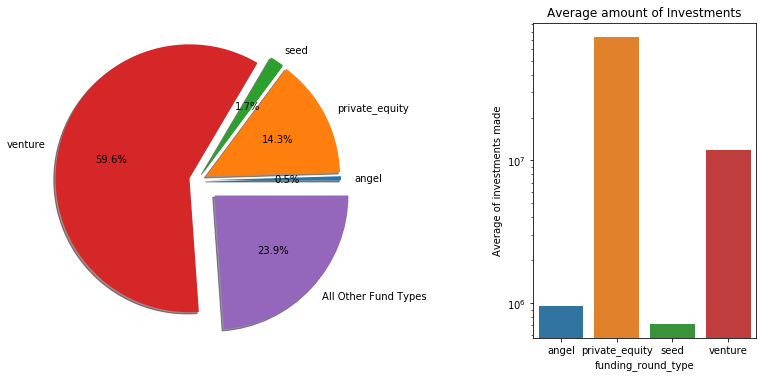

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
exp_vals = reqdFundTypesInvestments['raised_amount_usd']
exp_labels = reqdFundTypesInvestments['funding_round_type']
plt.pie(exp_vals,labels=exp_labels,shadow=True, autopct='%1.1f%%',radius=1.5,explode=[0.1,0.1,0.1,0.1,0.25])

plt.subplot(1, 2, 2)
sns.barplot(y=avgInvestmentReqdFundTypes['raised_amount_usd'], x = avgInvestmentReqdFundTypes['funding_round_type'],  
            data = avgInvestmentReqdFundTypes)
plt.title("Average amount of Investments")
plt.yscale('log')
plt.ylabel('Average of investments made')

plt.subplots_adjust(bottom=0.15, wspace=1)
plt.savefig("Plot1.jpeg")
plt.show()

#### 2. A plot showing the top 9 countries against the total amount of investments of funding type ***Venture***

In this plot below it shows the amount of investment made in Venture type by all top9 countries. Also it shows the amount invested by top 3 English speaking countries (highlighted in Greens)

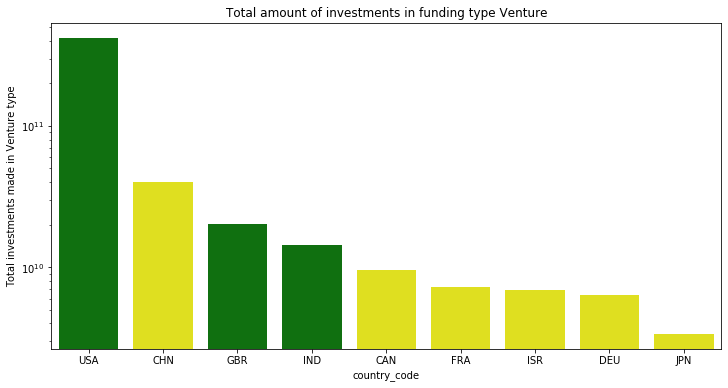

In [149]:
plt.figure(figsize=(12, 6))
clrs = ['green' if (x=='USA' or x=='GBR' or x=='IND' ) else 'yellow' for x in top9['country_code'] ]
sns.barplot(y=top9['Total_Investment'], 
            x = top9['country_code'],  
            data = top9,
            palette=clrs)
plt.title("Total amount of investments in funding type Venture")
plt.yscale('log')
plt.ylabel('Total investments made in Venture type')
plt.savefig("Plot2.jpeg")
plt.show()

In [150]:
#Preparing data for Plot3
USATop3 = D2Counts_USASorted.head(3)
GBRTop3 = D2Counts_GBRSorted.head(3)
INDTop3 = D2Counts_INDSorted.head(3)

USATop3['Country'] = 'USA'
GBRTop3['Country'] = 'GBR'
INDTop3['Country'] = 'IND'
USATop3.columns = ['Main_Sector','Count','Country']
GBRTop3.columns = ['Main_Sector','Count','Country']
INDTop3.columns = ['Main_Sector','Count','Country']

display(USATop3)
display(GBRTop3)
display(INDTop3)

Plot3 = pd.concat([USATop3, GBRTop3, INDTop3], axis = 0)
Plot3

,Main_Sector,Count,Country
6,Others,2950,USA
7,"Social, Finance, Analytics, Advertising",2714,USA
1,Cleantech / Semiconductors,2350,USA


,Main_Sector,Count,Country
6,Others,147,GBR
7,"Social, Finance, Analytics, Advertising",133,GBR
1,Cleantech / Semiconductors,130,GBR


,Main_Sector,Count,Country
6,Others,110,IND
7,"Social, Finance, Analytics, Advertising",60,IND
5,"News, Search and Messaging",52,IND


,Main_Sector,Count,Country
6,Others,2950,USA
7,"Social, Finance, Analytics, Advertising",2714,USA
1,Cleantech / Semiconductors,2350,USA
6,Others,147,GBR
7,"Social, Finance, Analytics, Advertising",133,GBR
1,Cleantech / Semiconductors,130,GBR
6,Others,110,IND
7,"Social, Finance, Analytics, Advertising",60,IND
5,"News, Search and Messaging",52,IND


#### 3: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 

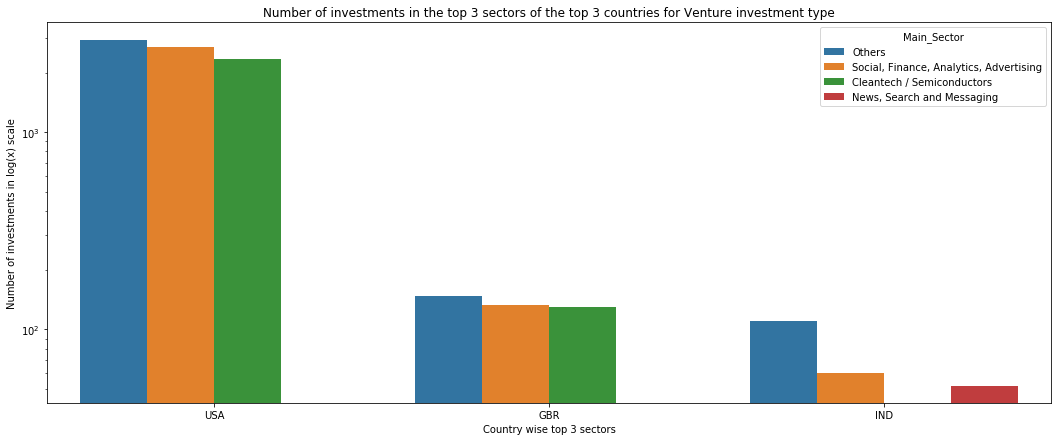

In [151]:
plt.figure(figsize=(18, 7))

sns.barplot(x="Country",
            y="Count",
            hue="Main_Sector",            
            data=Plot3)

plt.ylabel("Number of investments in log(x) scale")
plt.xlabel("Country wise top 3 sectors")
plt.title("Number of investments in the top 3 sectors of the top 3 countries for Venture investment type")
plt.yscale('log')
plt.savefig("Plot3.jpeg")
plt.show()